In [143]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [144]:
ds = xr.open_dataset('predicted_data/fcast010123_3days.grib',engine='cfgrib')

skipping variable: paramId==228246 shortName='u100'
Traceback (most recent call last):
  File "c:\Users\Lenovo\anaconda3\envs\weather\Lib\site-packages\cfgrib\dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "c:\Users\Lenovo\anaconda3\envs\weather\Lib\site-packages\cfgrib\dataset.py", line 641, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=10.0) new_value=Variable(dimensions=(), data=100.0)
skipping variable: paramId==228247 shortName='v100'
Traceback (most recent call last):
  File "c:\Users\Lenovo\anaconda3\envs\weather\Lib\site-packages\cfgrib\dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "c:\Users\Lenovo\anaconda3\envs\weather\Lib\site-packages\cfgrib\dataset.py", line 641, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key prese

In [145]:
ds

<xarray.Dataset> Size: 12GB
Dimensions:            (step: 41, latitude: 721, longitude: 1440,
                        isobaricInhPa: 13)
Coordinates:
    time               datetime64[ns] 8B ...
  * step               (step) timedelta64[ns] 328B 0 days 00:00:00 ... 10 day...
    heightAboveGround  float64 8B ...
  * latitude           (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude          (longitude) float64 12kB 0.0 0.25 0.5 ... 359.5 359.8
    valid_time         (step) datetime64[ns] 328B ...
    surface            float64 8B ...
    meanSea            float64 8B ...
    entireAtmosphere   float64 8B ...
  * isobaricInhPa      (isobaricInhPa) float64 104B 1e+03 925.0 ... 100.0 50.0
Data variables:
    u10                (step, latitude, longitude) float32 170MB ...
    v10                (step, latitude, longitude) float32 170MB ...
    sp                 (step, latitude, longitude) float32 170MB ...
    msl                (step, latitude, longitude) float32 170MB ...
    tcwv               (step, latitude, longitude) float32 170MB ...
    u                  (step, isobaricInhPa, latitude, longitude) float32 2GB ...
    v                  (step, isobaricInhPa, latitude, longitude) float32 2GB ...
    z                  (step, isobaricInhPa, latitude, longitude) float32 2GB ...
    t                  (step, isobaricInhPa, latitude, longitude) float32 2GB ...
    r                  (step, isobaricInhPa, latitude, longitude) float32 2GB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-04-28T00:22 GRIB to CDM+CF via cfgrib-0.9.1...

### Extracting weather features for first 5 steps(0,6,12,18,24hr) to get temperature for the first day of Jan 2023

In [146]:
ds_0 = ds.isel(step=0)
ds_6 = ds.isel(step=1)
ds_12 = ds.isel(step=2)
ds_18 = ds.isel(step=3)
ds_24 = ds.isel(step=4)

#### Slicing the dataset for the coordinates of Indian Subcontinent and at sea level pressure

In [147]:
ds0_Ind = ds_0.isel(latitude=slice(210,331),longitude=slice(270,391),isobaricInhPa=0)
ds0_Ind

<xarray.Dataset> Size: 588kB
Dimensions:            (latitude: 121, longitude: 121)
Coordinates:
    time               datetime64[ns] 8B ...
    step               timedelta64[ns] 8B 00:00:00
    heightAboveGround  float64 8B ...
  * latitude           (latitude) float64 968B 37.5 37.25 37.0 ... 8.0 7.75 7.5
  * longitude          (longitude) float64 968B 67.5 67.75 68.0 ... 97.25 97.5
    valid_time         datetime64[ns] 8B ...
    surface            float64 8B ...
    meanSea            float64 8B ...
    entireAtmosphere   float64 8B ...
    isobaricInhPa      float64 8B 1e+03
Data variables:
    u10                (latitude, longitude) float32 59kB ...
    v10                (latitude, longitude) float32 59kB ...
    sp                 (latitude, longitude) float32 59kB ...
    msl                (latitude, longitude) float32 59kB ...
    tcwv               (latitude, longitude) float32 59kB ...
    u                  (latitude, longitude) float32 59kB ...
    v                  (latitude, longitude) float32 59kB ...
    z                  (latitude, longitude) float32 59kB ...
    t                  (latitude, longitude) float32 59kB ...
    r                  (latitude, longitude) float32 59kB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-04-28T00:22 GRIB to CDM+CF via cfgrib-0.9.1...

Accessing temperature data


Text(0.5, 1.0, "India's predicted temperature on 1st Jan 2023")

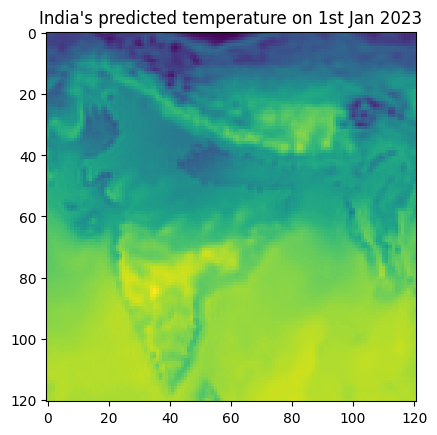

In [148]:
plt.imshow(ds0_Ind.t)
plt.title("India's predicted temperature on 1st Jan 2023")

### Converting temperature into Celsius

In [149]:
print(ds0_Ind.t)

<xarray.DataArray 't' (latitude: 121, longitude: 121)> Size: 59kB
array([[279.87482, 280.14825, 280.17365, ..., 278.52716, 278.59552, 278.9256 ],
       [279.69122, 280.02325, 279.951  , ..., 277.43732, 277.8377 , 278.2342 ],
       [279.4334 , 279.60724, 279.5291 , ..., 277.56622, 278.19513, 278.57013],
       ...,
       [297.99396, 297.97443, 298.117  , ..., 298.53693, 298.40607, 298.26544],
       [298.1209 , 298.06427, 298.14435, ..., 298.44513, 298.4295 , 298.32794],
       [298.076  , 298.04083, 298.12286, ..., 298.45294, 298.47443, 298.42755]],
      dtype=float32)
Coordinates:
    time               datetime64[ns] 8B ...
    step               timedelta64[ns] 8B 00:00:00
    heightAboveGround  float64 8B ...
  * latitude           (latitude) float64 968B 37.5 37.25 37.0 ... 8.0 7.75 7.5
  * longitude          (longitude) float64 968B 67.5 67.75 68.0 ... 97.25 97.5
    valid_time         datetime64[ns] 8B ...
    surface            float64 8B ...
    meanSea            float64 

(121, 121)


Text(0.5, 1.0, "India's predicted temperature on 1st Jan 2023 00:00hrs")

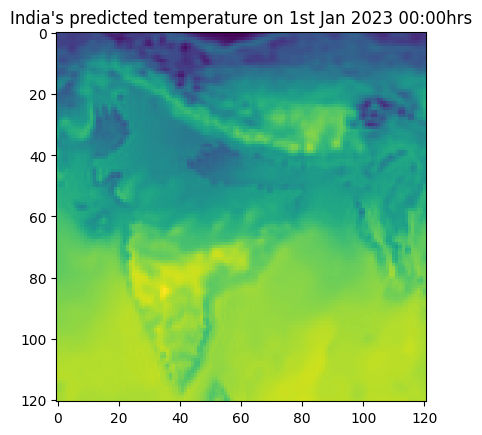

In [150]:
ds0_Ind = ds0_Ind.t
ds0_IndN = ds0_Ind.values
print(ds0_IndN.shape)
ds0_IndN = ds0_IndN - 273.15
plt.imshow(ds0_IndN)
plt.title("India's predicted temperature on 1st Jan 2023 00:00hrs")


In [151]:
print(ds0_IndN)

[[ 6.724823   6.9982605  7.023651  ...  5.3771667  5.445526   5.7756042]
 [ 6.5412292  6.8732605  6.800995  ...  4.287323   4.6877136  5.084198 ]
 [ 6.2834167  6.457245   6.37912   ...  4.4162292  5.0451355  5.4201355]
 ...
 [24.843964  24.824432  24.96701   ... 25.386932  25.256073  25.115448 ]
 [24.970917  24.914276  24.994354  ... 25.295135  25.27951   25.177948 ]
 [24.925995  24.890839  24.97287   ... 25.302948  25.324432  25.277557 ]]


### Getting temperatures for other time steps of 1st Jan2023 to get maximum temperature of the day

In [152]:
ds6_Ind = ds_6.isel(latitude=slice(210,331),longitude=slice(270,391),isobaricInhPa=0)
ds12_Ind = ds_12.isel(latitude=slice(210,331),longitude=slice(270,391),isobaricInhPa=0)
ds18_Ind = ds_18.isel(latitude=slice(210,331),longitude=slice(270,391),isobaricInhPa=0)
ds24_Ind = ds_24.isel(latitude=slice(210,331),longitude=slice(270,391),isobaricInhPa=0)


[[ 6.974884   7.2463684  7.461212  ...  9.04715    9.187775   9.498322 ]
 [ 6.6506653  6.8244934  6.8596497 ...  8.099884   8.469025   8.767853 ]
 [ 6.3557434  6.472931   6.4045715 ...  8.131134   8.621368   8.910431 ]
 ...
 [25.433868  25.492462  25.564728  ... 25.312775  25.38504   25.57254  ]
 [25.470978  25.492462  25.543243  ... 25.28543   25.371368  25.517853 ]
 [25.443634  25.459259  25.517853  ... 25.351837  25.420197  25.531525 ]]


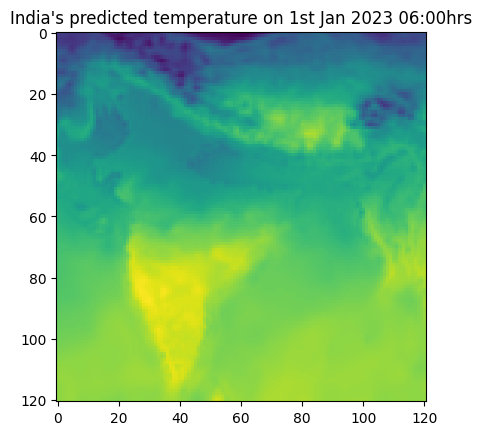

In [153]:
ds6_Ind = ds6_Ind.t
ds6_IndN = ds6_Ind.values
ds6_IndN = ds6_IndN - 273.15
plt.imshow(ds6_IndN)
plt.title("India's predicted temperature on 1st Jan 2023 06:00hrs")
print(ds6_IndN)

### Converting to numpy arrays and also converting temp. unit from K to C

In [154]:
ds12_Ind = ds12_Ind.t
ds12_IndN = ds12_Ind.values
ds12_IndN = ds12_IndN - 273.15

ds18_Ind = ds18_Ind.t
ds18_IndN = ds18_Ind.values
ds18_IndN = ds18_IndN - 273.15

ds24_Ind = ds24_Ind.t
ds24_IndN = ds24_Ind.values
ds24_IndN = ds24_IndN - 273.15

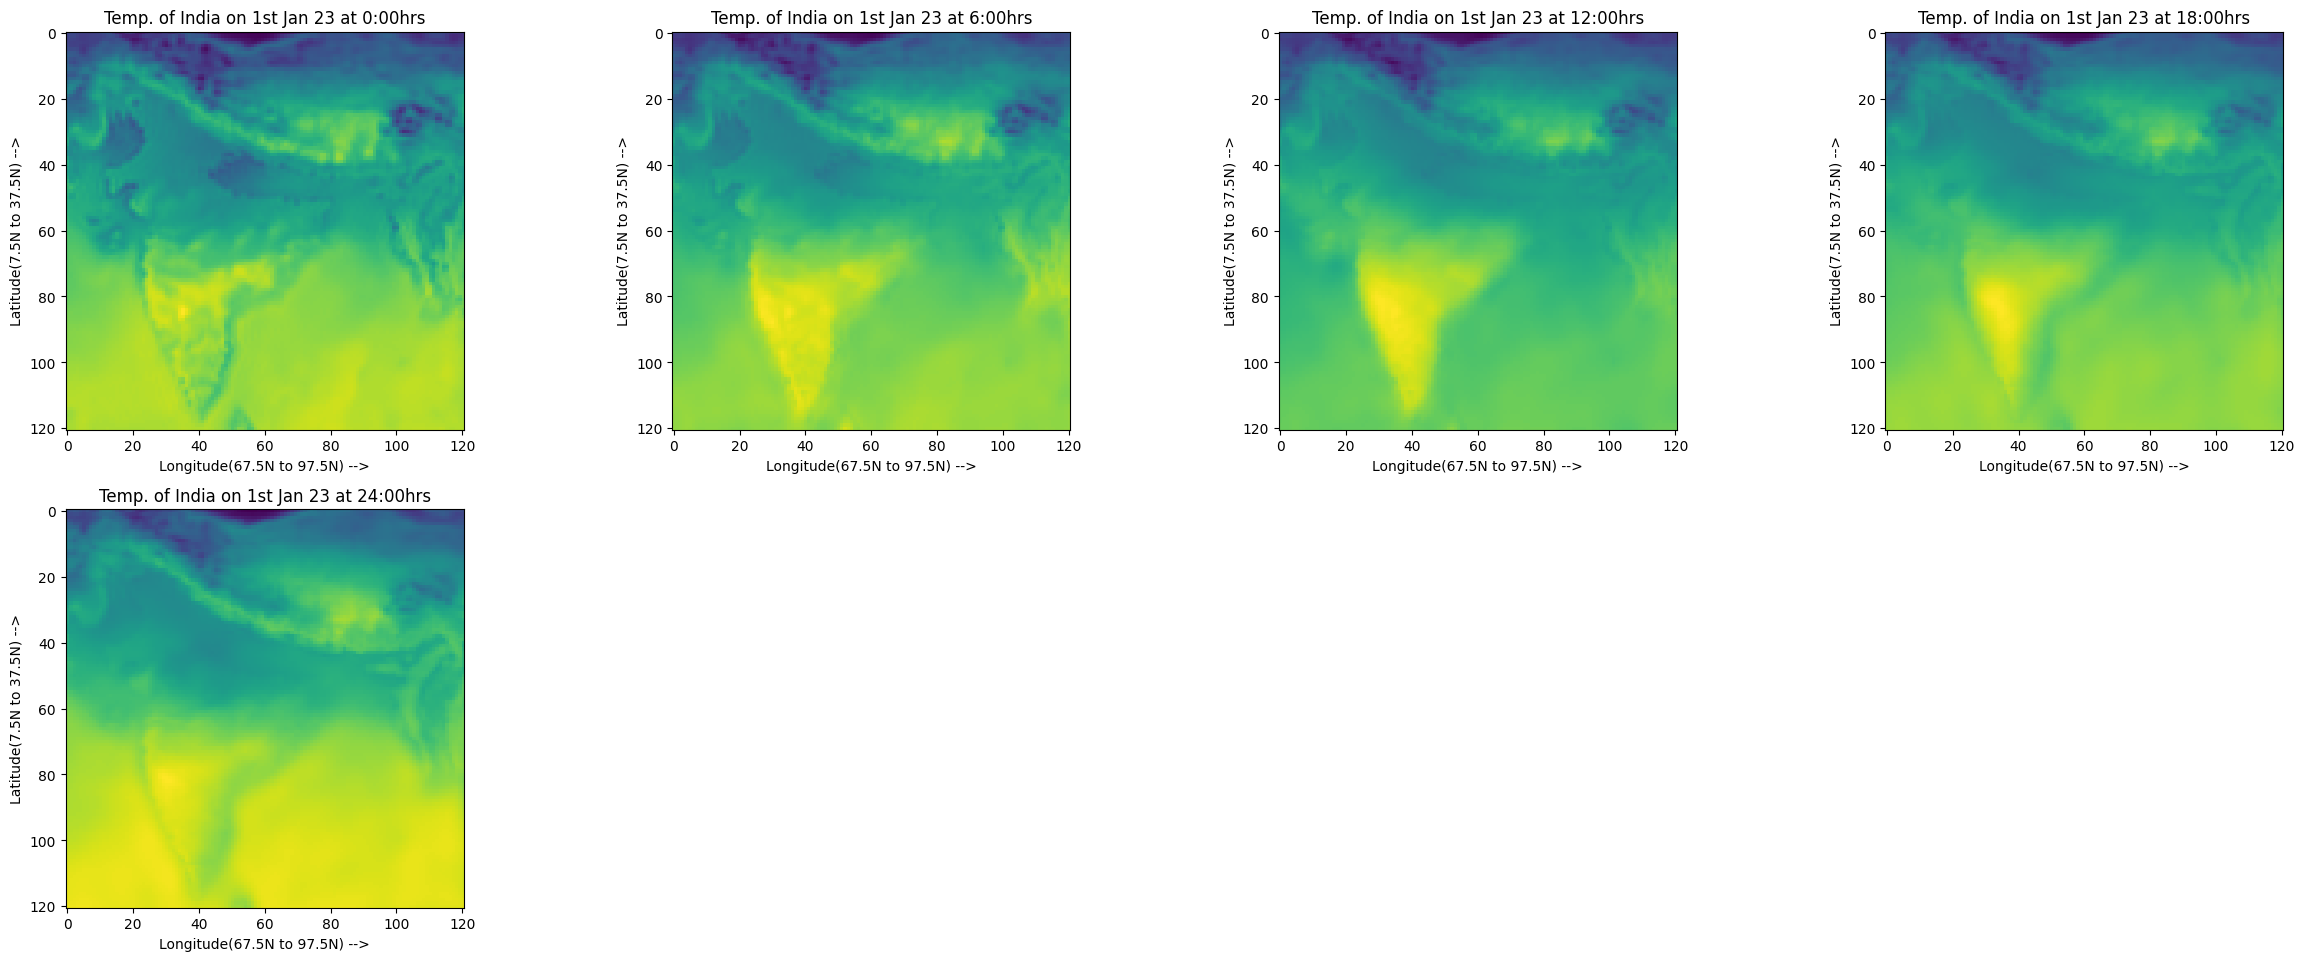

In [155]:
ds_IndN = [ds0_IndN,ds6_IndN,ds12_IndN,ds18_IndN,ds24_IndN]
fig = plt.figure(figsize=(30,30))
for i in range(5):
    fig.add_subplot(5,4,i+1)
    plt.imshow(ds_IndN[i],cmap='viridis',label = i)
    plt.title(f'Temp. of India on 1st Jan 23 at {i*6}:00hrs')
    plt.ylabel('Latitude(7.5N to 37.5N) -->')
    plt.xlabel('Longitude(67.5N to 97.5N) -->')
    

plt.show()


### Finding maximum temp. for 1st January 2023

Text(0.5, 0, 'Longitude(67.5N to 97.5N) -->')

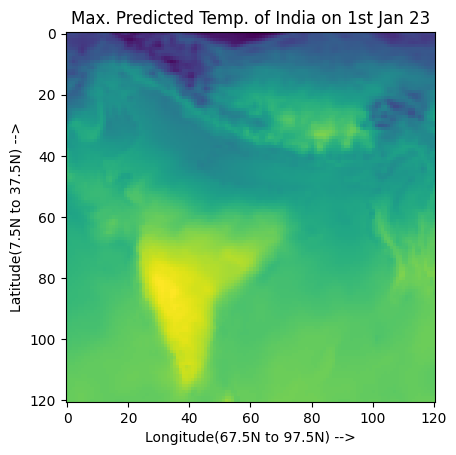

In [156]:
arrays = np.stack([ds0_IndN,ds6_IndN,ds12_IndN,ds18_IndN,ds24_IndN])
ds_IndN_max = np.max(arrays, axis=0)
im = plt.imshow(ds_IndN_max)

plt.title(f'Max. Predicted Temp. of India on 1st Jan 23')
plt.ylabel('Latitude(7.5N to 37.5N) -->')
plt.xlabel('Longitude(67.5N to 97.5N) -->')

In [157]:
print(ds_IndN_max)
print(f'Shape of predicted temp. matrix: {ds_IndN_max.shape}')

[[ 9.570343   9.822296  10.0000305 ...  9.04715    9.187775   9.498322 ]
 [ 9.22464    9.322296   9.34964   ...  8.355499   8.6250305  8.847687 ]
 [ 8.798859   8.910187   8.863312  ...  8.6562805  9.0000305  9.169952 ]
 ...
 [25.9805    26.03128   26.085968  ... 25.904327  25.873077  25.871124 ]
 [26.015656  26.039093  26.085968  ... 26.01175   26.017609  26.029327 ]
 [26.007843  26.023468  26.072296  ... 26.16214   26.189484  26.216827 ]]
Shape of predicted temp. matrix: (121, 121)


In [158]:
real_Ind = np.genfromtxt('actual_data/IND010123MaxTemp.TXT')
real_Ind.shape

(31, 31)

Text(0.5, 0, 'Longitude(67.5N to 97.5N) -->')

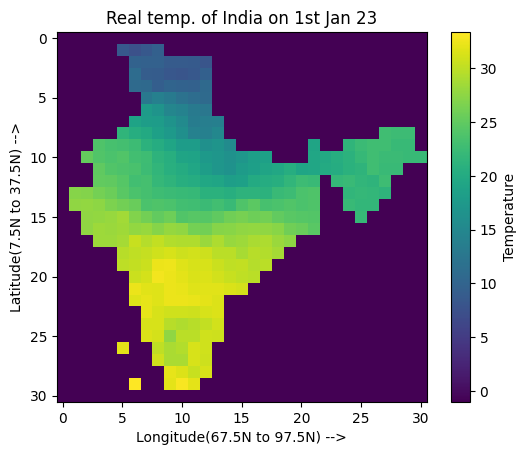

In [159]:
im = plt.imshow(real_Ind)
plt.colorbar(im,label='Temperature')

plt.title('Real temp. of India on 1st Jan 23')
plt.ylabel('Latitude(7.5N to 37.5N) -->')
plt.xlabel('Longitude(67.5N to 97.5N) -->')

### Plotting for first 3 days of every month

Here every plot is of Maximum temperature throughout the day. Actual temperature data has the maximum temperature recorded more accurately.
Predicted temperature data has meteorological data of India every 6 hrs. So, for getting the maximum temperature, maximum of the temperature of entire day(4 values for every coordinate) was taken.

skipping variable: paramId==228246 shortName='u100'
Traceback (most recent call last):
  File "c:\Users\Lenovo\anaconda3\envs\weather\Lib\site-packages\cfgrib\dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "c:\Users\Lenovo\anaconda3\envs\weather\Lib\site-packages\cfgrib\dataset.py", line 641, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=10.0) new_value=Variable(dimensions=(), data=100.0)
skipping variable: paramId==228247 shortName='v100'
Traceback (most recent call last):
  File "c:\Users\Lenovo\anaconda3\envs\weather\Lib\site-packages\cfgrib\dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "c:\Users\Lenovo\anaconda3\envs\weather\Lib\site-packages\cfgrib\dataset.py", line 641, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key prese

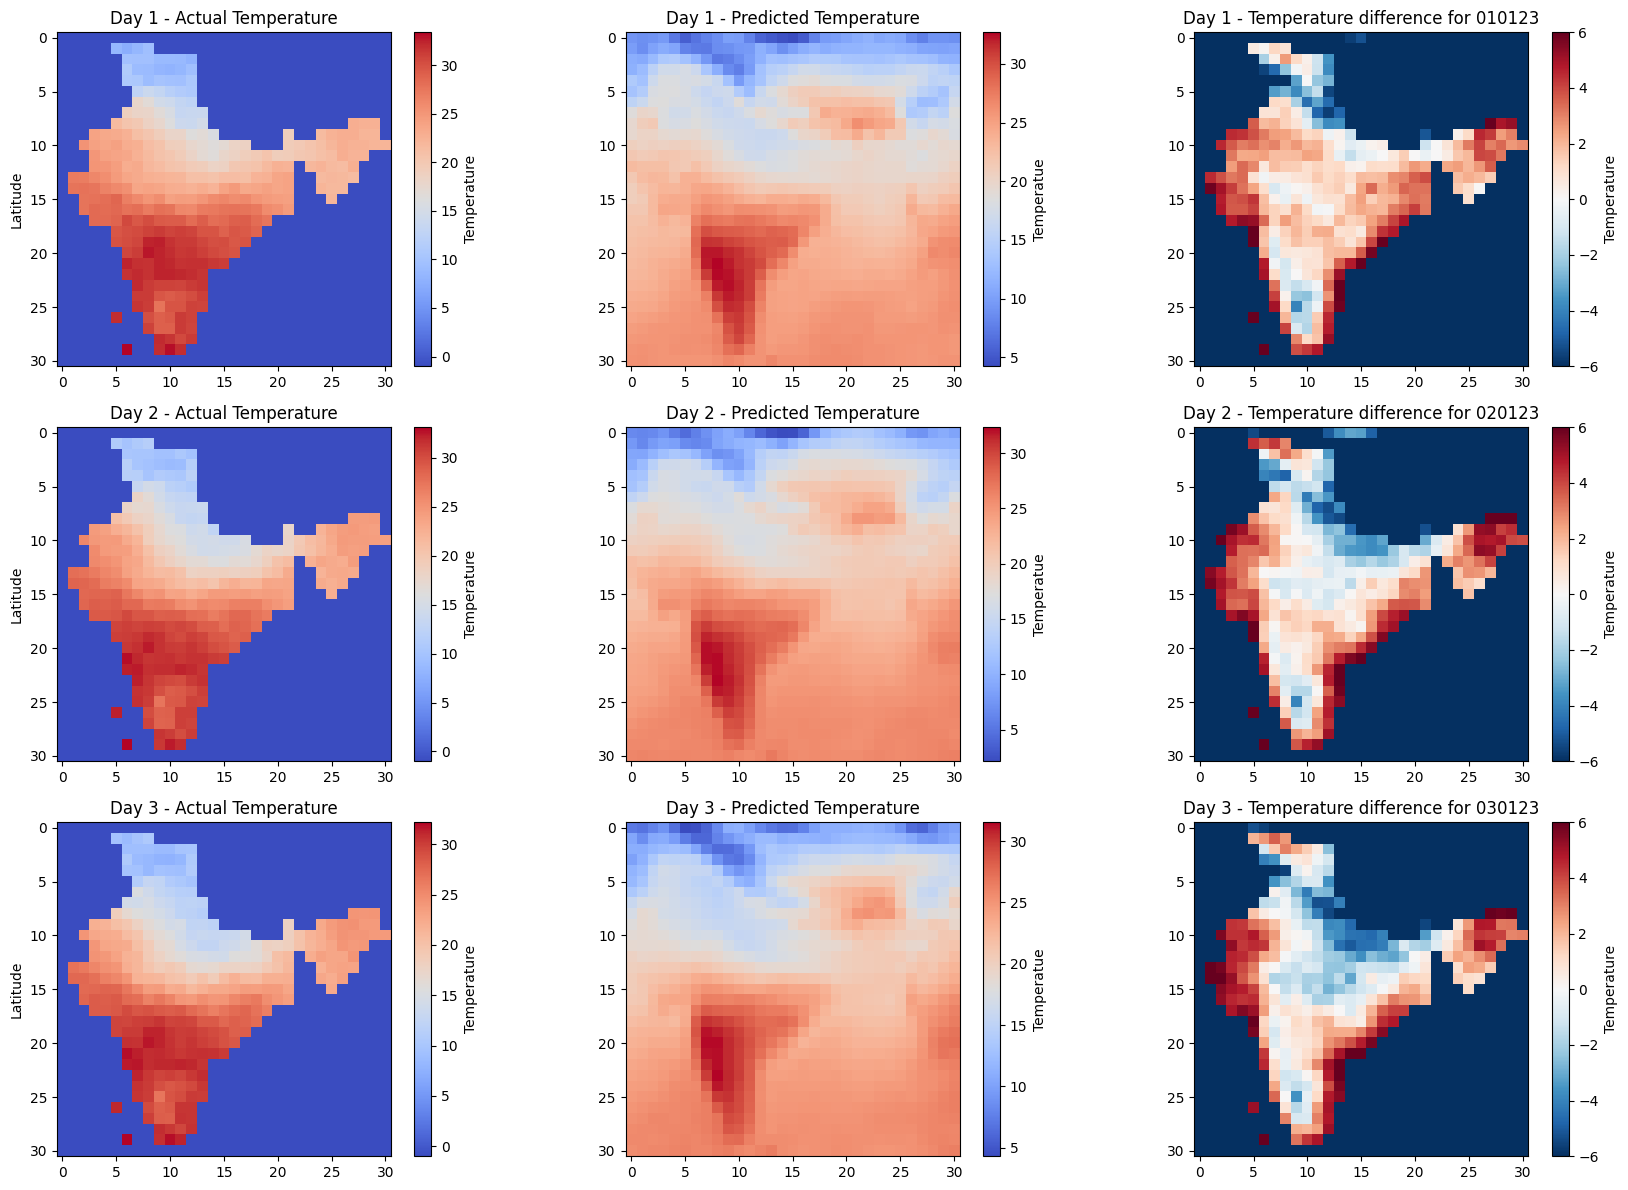

In [160]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset
ds = xr.open_dataset('predicted_data/fcast010123_3days.grib', engine='cfgrib')

# Creating a figure with subplots for first 3 days, 3 plots per day (real, predicted, difference)
fig, axes = plt.subplots(3, 3, figsize=(18, 12))

def load_actual_temp(day):
    date_str = f"{day:02d}0123" # Format in DDMMYYYY
    # Load the actual temperature data for the given day
    filename = f"actual_data/IND{date_str}MaxTemp.txt"
    return np.loadtxt(filename), date_str

def downsample(original_data):

    #Reshaping and computing mean
    rows, cols = original_data.shape
    if rows == 121 and cols == 121:
        
        downsampled_data = np.zeros((31, 31))
        
        row_ratio = rows / 31
        col_ratio = cols / 31
        
        for i in range(31):
            for j in range(31):
                row_start = int(i * row_ratio)
                row_end = int((i + 1) * row_ratio)
                col_start = int(j * col_ratio)
                col_end = int((j + 1) * col_ratio)
                
                downsampled_data[i, j] = np.mean(original_data[row_start:row_end, col_start:col_end])

    return downsampled_data



for day in range(1, 4):
    # For day 1, use steps 0-4
    # For subsequent days, use steps in groups of 4 (5-8 for day 2, 9-12 for day 3, etc.)
    start_step = 0 if day == 1 else 5 + (day-2)*4
    end_step = start_step + 3
    if day==1:
        start_step = 0
        end_step = 4
    # Extract the steps for the current day
    day_steps = list(range(start_step, end_step))
    Temp = []
    for step in day_steps:
        t = ds.isel(step=step)
        Temp.append(t)

    TempSlice = []
    for temp in Temp:
        tt = temp.isel(latitude=slice(210,331),longitude=slice(270,391),isobaricInhPa=0) # Assuming surface temperture
        # Got the xdataarray for temp. values
        tt_xdataarray = tt.t
        tt_numpy = tt_xdataarray.values # Converted to numpy array
        tt_numpy = tt_numpy - 273.15 # Changed the temperature from K to C
        TempSlice.append(tt_numpy)

    arrays = np.stack(TempSlice)
    temp_data = np.max(arrays, axis=0)
    
    # Downsample the predicted data from 121x121 to 31x31
    downsampled_temp = downsample(temp_data)
    
    actual_temp,date_str = load_actual_temp(day)
    
    temp_diff =  actual_temp - downsampled_temp
    
    # Plot the actual temperature
    im1 = axes[day-1, 0].imshow(actual_temp, cmap='coolwarm', vmin=np.min(actual_temp), vmax=np.max(actual_temp))
    axes[day-1, 0].set_title(f'Day {day} - Actual Temperature')
    plt.colorbar(im1, ax=axes[day-1, 0], fraction=0.046, pad=0.04, label = 'Temperature')
    
    # Plot the predicted temperature
    im2 = axes[day-1, 1].imshow(downsampled_temp, cmap='coolwarm', vmin=np.min(downsampled_temp), vmax=np.max(downsampled_temp))
    axes[day-1, 1].set_title(f'Day {day} - Predicted Temperature')
    plt.colorbar(im2, ax=axes[day-1, 1], fraction=0.046, pad=0.04, label = 'Temperatue')
    
    # Plot the temperature difference
    im1 = axes[day-1, 2].imshow(temp_diff, cmap='RdBu_r', vmin=-6, vmax=6)
    axes[day-1, 2].set_title(f'Day {day} - Temperature difference for {date_str}')
    plt.colorbar(im1, ax=axes[day-1, 2], fraction=0.046, pad=0.04, label = 'Temperature')
    
    # Set common labels for the row
    axes[day-1, 0].set_ylabel('Latitude')
    
    if day < 10:
        for i in range(3):
            axes[day-1, i].set_xlabel('')
    else:
        for i in range(3):
            axes[day-1, i].set_xlabel('Longitude')

plt.tight_layout()
# save the figure
plt.savefig('results/jan.png', dpi=300)
plt.show()

